# Task 4: Optimize Portfolio Based on Forecast

In this task, we'll use the forecasted data from Task 3 to make informed decisions about optimizing a sample investment portfolio. The objective is to adjust the portfolio to maximize returns while minimizing risks based on the predicted market trends.

Use a simple portfolio with three assets:
- Tesla Stock (TSLA) - A growth stock with higher risk.
- Vanguard Total Bond Market ETF (BND) - A bond ETF for stability.
- S&P 500 ETF (SPY) - An index fund for diversification.


First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from portfolio_optimization import PortfolioOptimizer

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
# Define path to forecasted data
path = '../data/'
tsla = f'{path}tsla_forecast_12_months.csv'
bnd = f'{path}bnd_forecast_12_months.csv'
spy = f'{path}spy_forecast_12_months.csv'


In [3]:
# Create PortfolioOptimizer object with forecasted data CSVs
optimizer = PortfolioOptimizer(tsla, bnd, spy, logger=logger)


Annual Returns for each asset:
 TSLA    0.275311
BND    -0.008318
SPY     0.017371
dtype: float64

Initial Portfolio Statistics:
Expected Return: 0.09478800078202416
Risk (Volatility): 0.005508174501836935
Sharpe Ratio: 17.208605273927517

Optimized Portfolio Results:
Optimal Weights: [0.23430286 0.         0.76569714]
Expected Return: 0.07780695759119403
Risk (Volatility): 0.004165895723859356
Sharpe Ratio: 18.677125580837235

Risk Metrics for Optimized Portfolio:
Volatility: 0.005508174501836936
Value at Risk (VaR) at 95% Confidence: 2.8330177800350856e-05


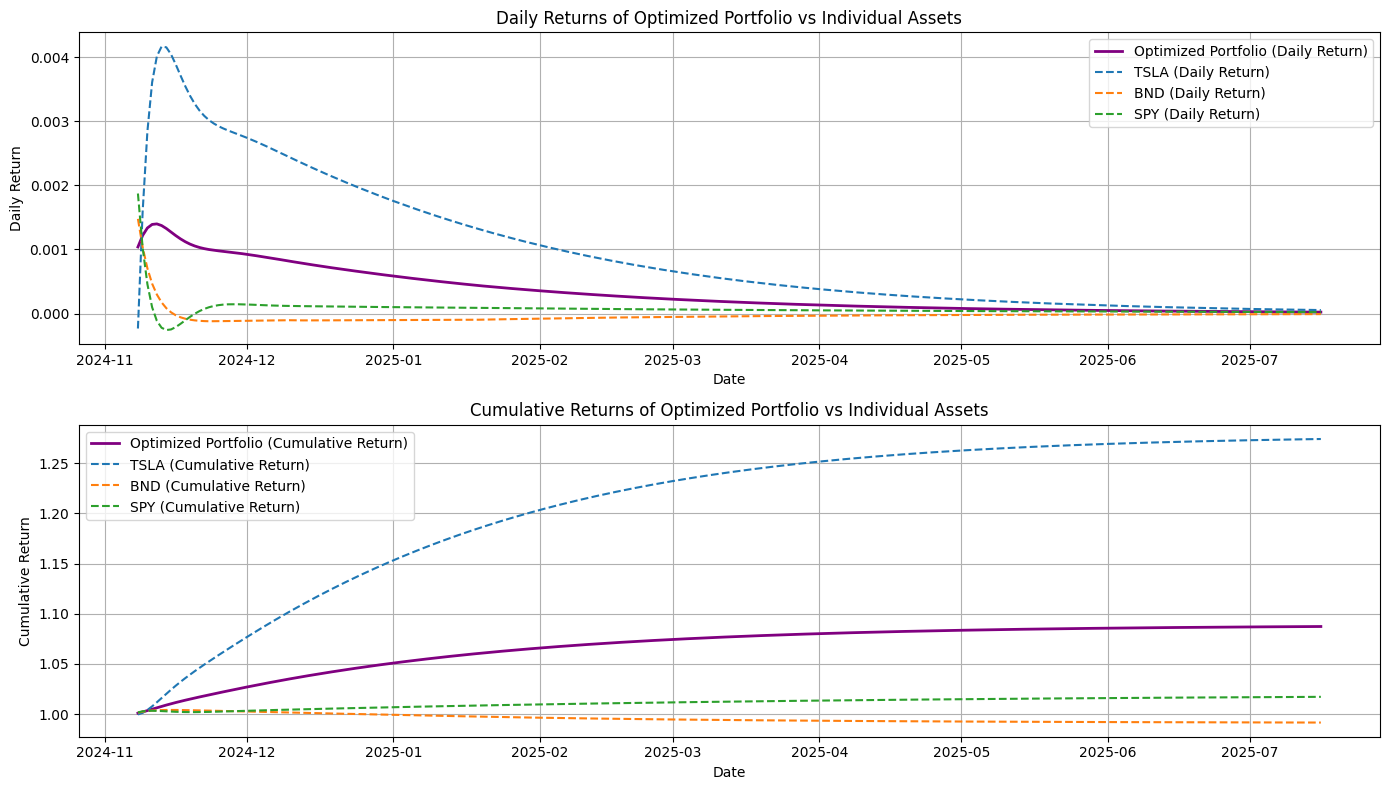


Portfolio Summary:
Optimized Weights: [0.23430286 0.         0.76569714]
Expected Portfolio Return: 0.07780695759119403
Expected Portfolio Volatility: 0.004165895723859356
Sharpe Ratio: 18.677125580837235
Annualized Volatility: 0.005508174501836936
Value at Risk (VaR) at 95% Confidence: 2.8330177800350856e-05


In [4]:
# Calculate annual returns for each asset
annual_returns = optimizer.calculate_annual_returns()
print("Annual Returns for each asset:\n", annual_returns)

# Get portfolio statistics for current weights (initially set to equal weights)
initial_portfolio_stats = optimizer.portfolio_statistics(optimizer.weights)
print("\nInitial Portfolio Statistics:")
print(f"Expected Return: {initial_portfolio_stats[0]}")
print(f"Risk (Volatility): {initial_portfolio_stats[1]}")
print(f"Sharpe Ratio: {initial_portfolio_stats[2]}")

# Optimize portfolio weights to maximize Sharpe Ratio
optimal_results = optimizer.optimize_portfolio()
print("\nOptimized Portfolio Results:")
print(f"Optimal Weights: {optimal_results['weights']}")
print(f"Expected Return: {optimal_results['return']}")
print(f"Risk (Volatility): {optimal_results['risk']}")
print(f"Sharpe Ratio: {optimal_results['sharpe_ratio']}")

# Calculate and print risk metrics for the optimized portfolio
risk_metrics = optimizer.risk_metrics()
print("\nRisk Metrics for Optimized Portfolio:")
print(f"Volatility: {risk_metrics['volatility']}")
print(f"Value at Risk (VaR) at 95% Confidence: {risk_metrics['VaR_95']}")

# Visualize the portfolio performance over time
optimizer.visualize_portfolio_performance()

# Generate and print a summary of the portfolio's performance metrics
portfolio_summary = optimizer.summary()
print("\nPortfolio Summary:")
for key, value in portfolio_summary.items():
    print(f"{key}: {value}")